In [ ]:
#import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/dmg ass3/covtype_train.csv")

Mounted at /content/drive
(2239, 11)


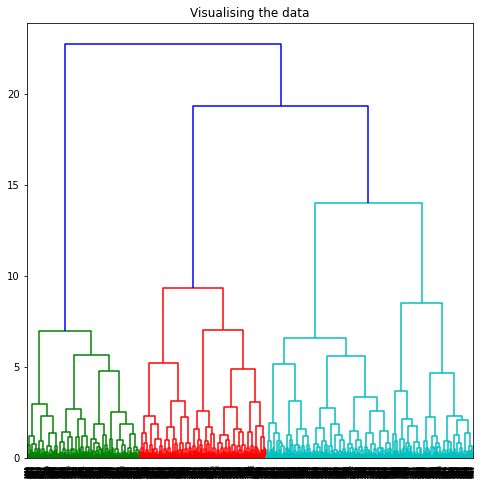

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics


df = pd.read_csv("covtype_train.csv")
df.drop_duplicates(keep=False,inplace=True)

#converting object to category 
df = df.astype({"Elevation":'category','Aspect':'category','Slope':'category','Hillshade_9am':'category','Hillshade_Noon':'category','Horizontal_Distance_To_Fire_Points':'category'})
for c in df.columns:
    df[c] = df[c].astype('category').cat.codes
print(df.shape)
newdf=df
#newdf.drop(columns='target')

#normalizing data 

sc = StandardScaler()
df_scaled = sc.fit_transform(newdf)
df_normalized = normalize(df_scaled)

# Reduction of  dimensionality of data to 3 features
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2','P3']
#
# Create the Dendogram plot
#
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='ward')))

In [ ]:
df.target.unique()


array([3, 1, 6, 4, 5, 2, 0], dtype=int8)

2239
[[ 0.5764235   0.02099307 -0.08420748]
 [-0.21031729 -0.19309133 -0.28323077]
 [ 0.11152992 -0.05240793  0.41716702]
 [-0.05172056  0.47001617  0.47032419]
 [-0.53160811  0.19467304 -0.09955337]
 [-0.16773611  0.69237907 -0.12287428]
 [-0.21932041 -0.33972807  0.41939733]]


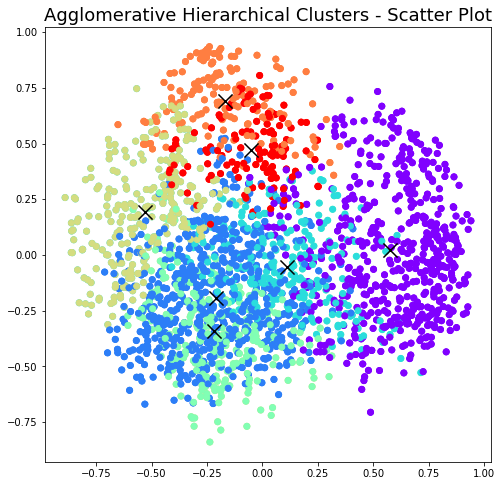

In [ ]:
agc = AgglomerativeClustering(n_clusters = 7)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')


x,y=df_pca['P1'],df_pca['P2']
df_pca['labels']=agc.labels_

df_pca.groupby('labels').nunique()
centroid=[]
for i in df_pca.labels.unique():
  l1=[]
  l1=df_pca[agc.labels_ == i ]
  c1=l1['P1'].sum()/len(l1)
  c2=l1['P2'].sum()/len(l1)
  c3=l1['P3'].sum()/len(l1)
  centroid.append([c1,c2,c3])
centroid = np.array(centroid)

print(centroid)


plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.scatter(centroid[:,0],centroid[:,1], c="black", s=200, marker=('x'))
plt.show()



Comparison of true labels with cluster distributions Q1(3Part)

In [ ]:
#Giving clusters labels according to the majority data points belonging there
cluster=agc.fit_predict(df_pca)
cluster_labels = []
for i in range(agc.n_clusters):
  dist = np.unique(df['target'][cluster==i], return_counts=True)
  #print(dist)
  cluster_labels.append(dist[0][np.argmax(dist[1])])
cluster_labels

[2, 1, 6, 0, 0, 1, 6]

In [ ]:
#Giving predicted clusters labels according to the cluster they belong
predict_labels_data = np.array([cluster_labels[i] for i in cluster])
predict_labels_data

array([2, 2, 1, ..., 0, 2, 1], dtype=int8)

In [ ]:
sklearn.metrics.accuracy_score(df['target'], predict_labels_data)


0.44707458686913804